<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%2011%20/%20week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection**

Metode yang digunakan:


1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

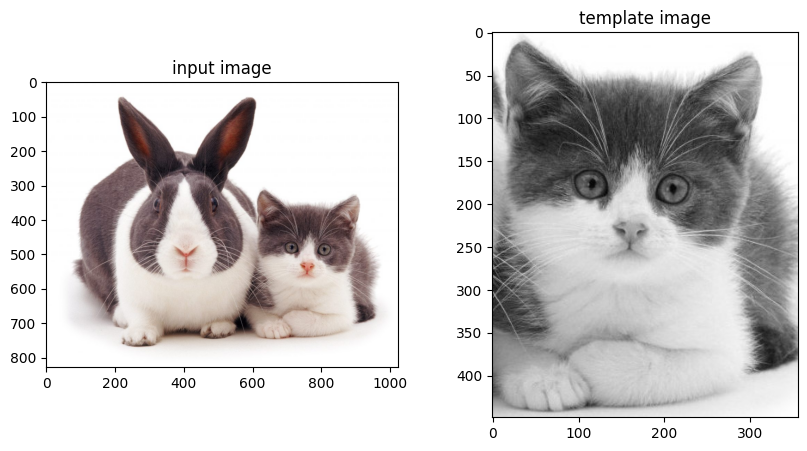

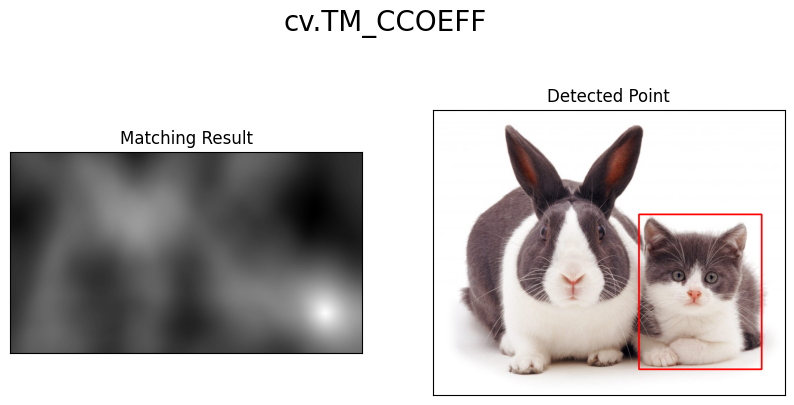

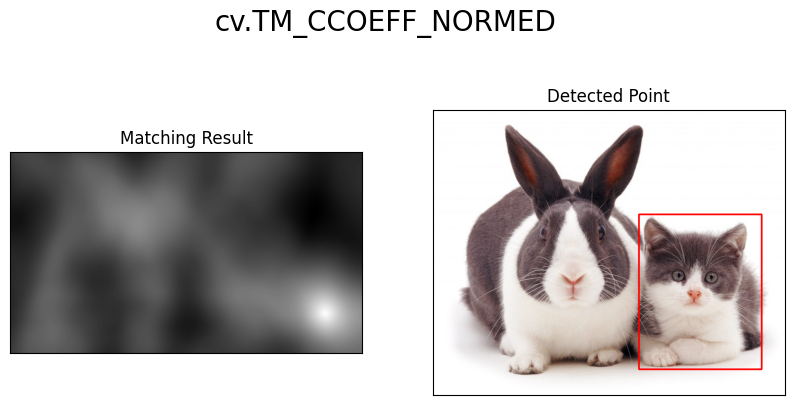

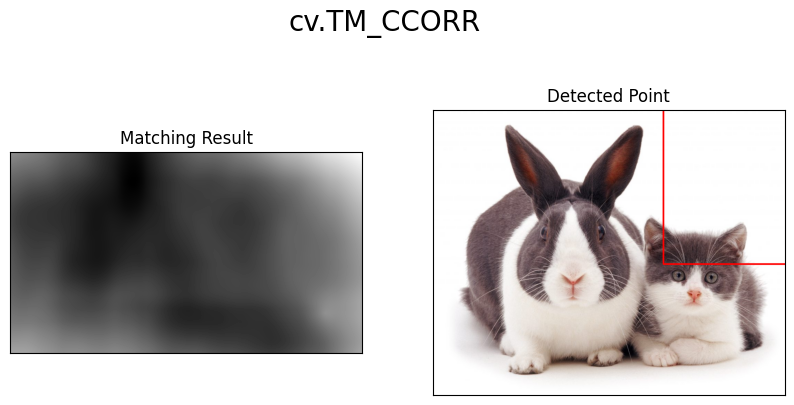

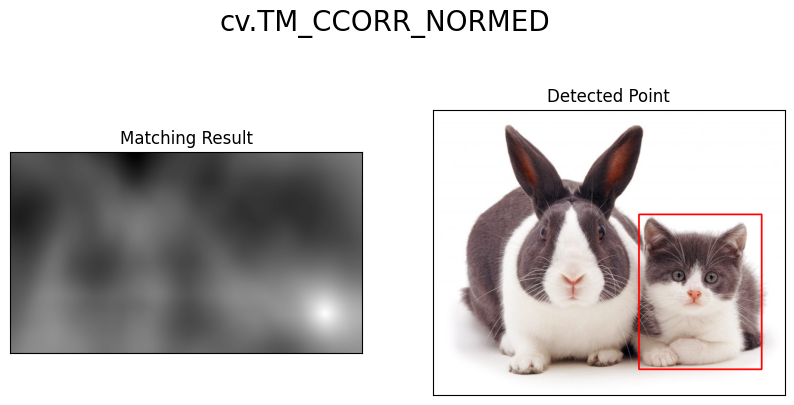

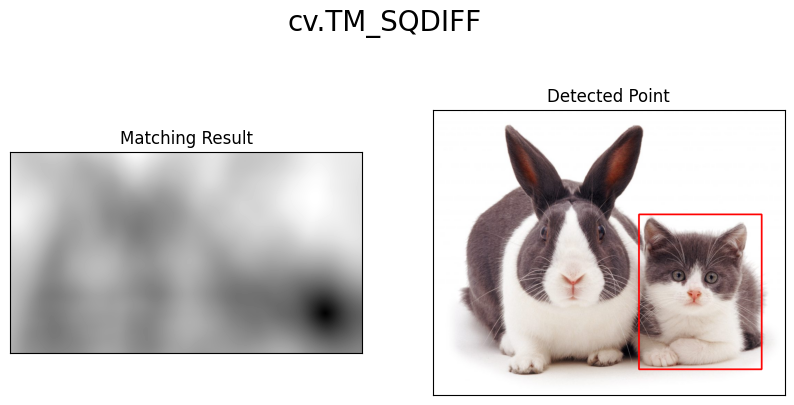

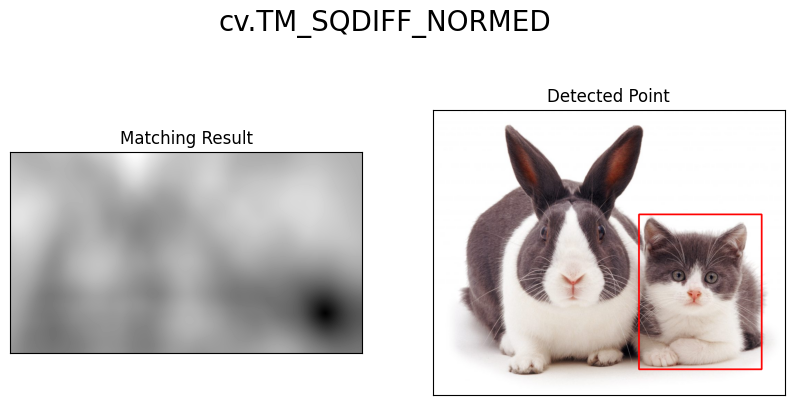

In [4]:

# Load the input image and convert it to grayscale
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Load the template image
template = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

# Create a copy of the input image for visualization purposes
img2 = img.copy()

# Create a plot for the input and template images
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
axarr[1].set_title("template image")

# Define the 6 methods for comparison
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Loop over each method and apply template matching
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img_gray, template, method)

    # Find the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take the minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Calculate the bottom right corner of the bounding box
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a red rectangle around the matched region
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

    # Create a plot for the matching result and the detected point
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

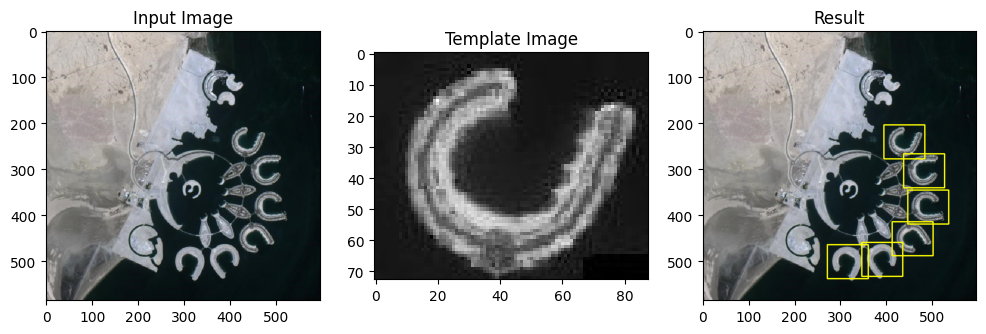

In [5]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# Load input image and template
image = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/bahrain.jpg', cv2.IMREAD_COLOR)
template = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/bahrain-template.jpg', cv2.IMREAD_COLOR)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
image_plot = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/bahrain.jpg', cv2.IMREAD_COLOR)
# Get template width and height
h, w = template.shape[:2]

# Specify matching method and threshold
method = cv2.TM_CCOEFF_NORMED
threshold = 0.4

# Start timer
start_time = time.time()

# Match template
res = cv2.matchTemplate(image, template, method)

# Fake out max_val for first run through loop
max_val = 1
prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = None, None, None, None
while max_val > threshold:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Prevent infinite loop. If those 4 values are the same as previous ones, break the loop.
    if prev_min_val == min_val and prev_max_val == max_val and prev_min_loc == min_loc and prev_max_loc == max_loc:
        break
    else:
        prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = min_val, max_val, min_loc, max_loc
    
    if max_val > threshold:
        # Prevent start_row, end_row, start_col, end_col be out of range of image
        start_row = max(0, max_loc[1] - h // 2)
        start_col = max(0, max_loc[0] - w // 2)
        end_row = min(res.shape[0], max_loc[1] + h // 2 + 1)
        end_col = min(res.shape[1], max_loc[0] + w // 2 + 1)

        res[start_row: end_row, start_col: end_col] = 0
        
        # Draw rectangle around matched template
        cv2.rectangle(image, (max_loc[0], max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0, 255, 255), 2)

# Convert BGR image to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Display input image, template image, and result
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv2.cvtColor(image_plot, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[0].axis('on')

ax[1].imshow(template_gray, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('on')

ax[2].imshow(image_rgb)
ax[2].set_title('Result')
ax[2].axis('on')
ax[2].add_patch

plt.show()

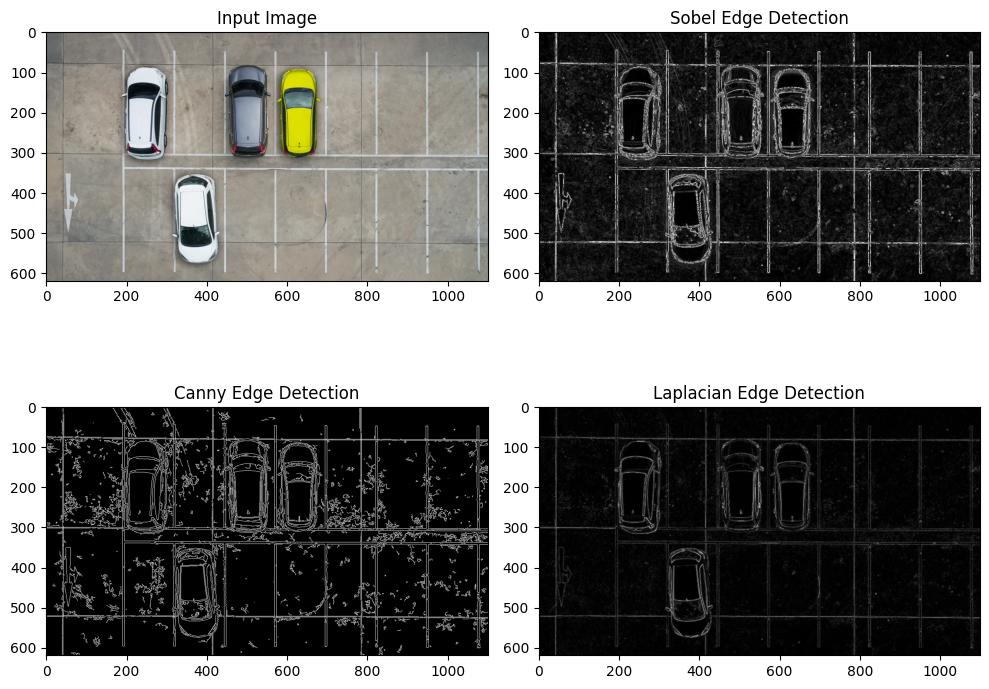

In [7]:
# Load input image
image = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/car-park.jpg', cv.IMREAD_COLOR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert image to grayscale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv.Sobel(image_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image_gray, cv.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Canny Edge Detection
canny = cv.Canny(image_gray, threshold1=30, threshold2=100)

# Laplacian Edge Detection
laplacian = cv.Laplacian(image_gray, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian)  # Convert to uint8

# Plot input image and results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.flatten()

ax[0].imshow(image_rgb)
ax[0].set_title('Input Image')

ax[1].imshow(sobel, cmap='gray')
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(canny, cmap='gray')
ax[2].set_title('Canny Edge Detection')

ax[3].imshow(laplacian, cmap='gray')
ax[3].set_title('Laplacian Edge Detection')

for a in ax:
    a.axis('on')

plt.tight_layout()
plt.show()

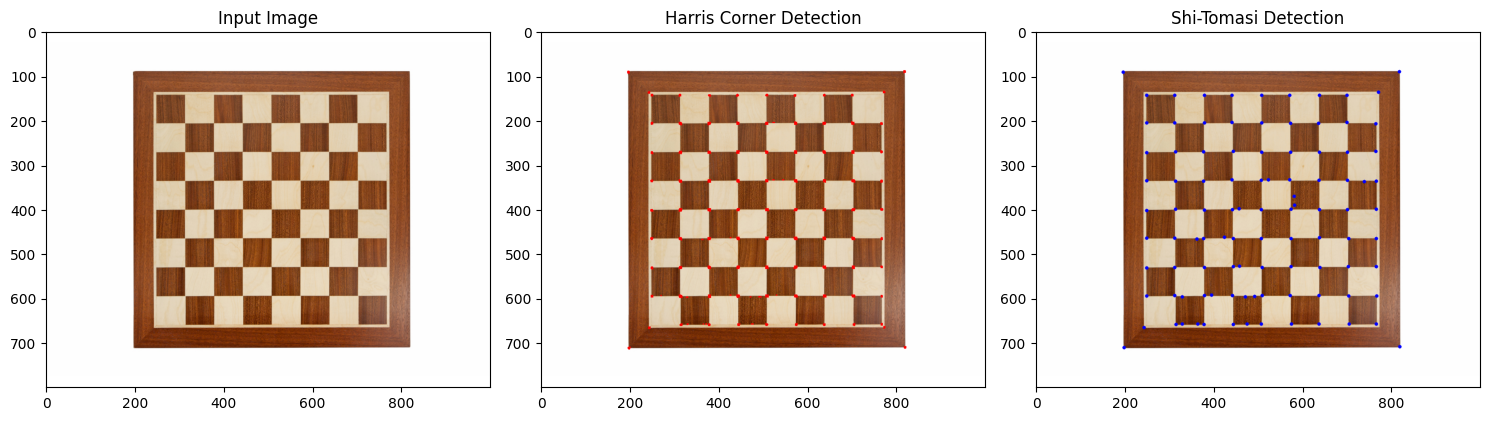

In [26]:
# Load input image
image = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/chess-board.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv.cornerHarris(image_gray, blockSize=4, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)  # Dilate corners to enhance them
image_harris = image_rgb.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # Mark corners in red

# Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(image_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
image_shi_tomasi = image_rgb.copy()
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image_shi_tomasi, (x, y), 4, (0, 0, 255), -1)  # Mark corners in blue

# Plot input image and results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.flatten()

ax[0].imshow(image_rgb)
ax[0].set_title('Input Image')
ax[0].axis('on')

ax[1].imshow(image_harris)
ax[1].set_title('Harris Corner Detection')
ax[1].axis('on')

ax[2].imshow(image_shi_tomasi)
ax[2].set_title('Shi-Tomasi Detection')
ax[2].axis('on')

plt.tight_layout()
plt.show()

Number of Hough lines: 33
Number of filtered lines: 20


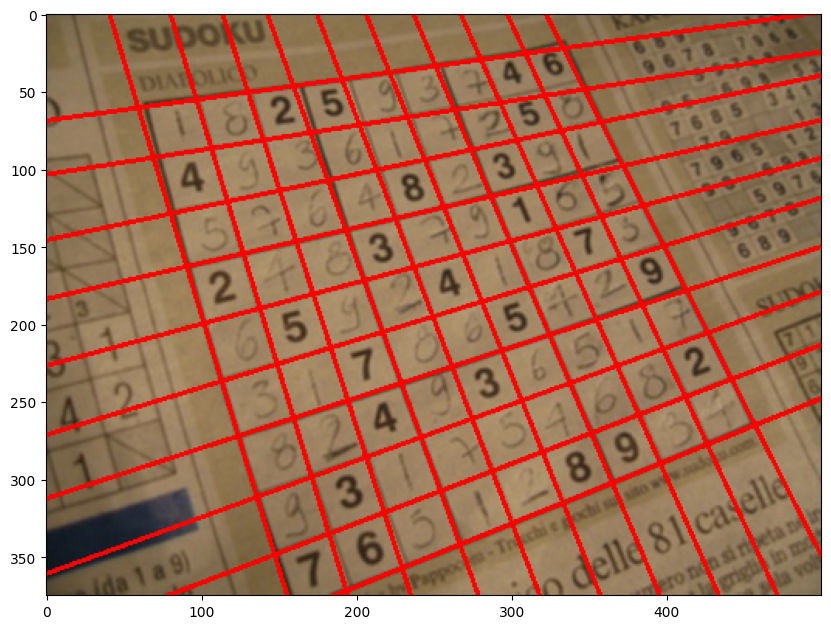

In [40]:
# Load the input image
input_img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Step 1: Apply Canny Edge Detection
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Step 2: Dilate the edge image
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Step 3: Erode the dilated image
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Step 4: Apply HoughLines transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

if lines is None:
    print('No lines were found')
    exit()

# Step 5: Merge similar lines
rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue

    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

print('Number of Hough lines:', len(lines))

filtered_lines = []

for i in range(len(lines)):
    if line_flags[i]:
        filtered_lines.append(lines[i])

print('Number of filtered lines:', len(filtered_lines))

# Draw the merged lines on the input image
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

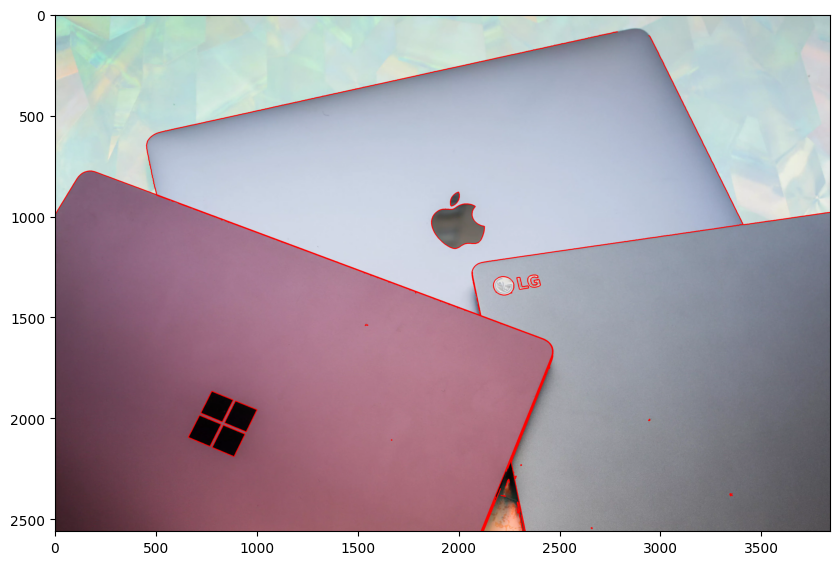

In [44]:
# Load input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
edged = cv.Canny(img_gray, 30, 200)

# Find contours
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
cv.drawContours(img, contours, -1, (0, 0, 255), 3)

# Display the image with contours
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('on')
plt.show()